<a href="https://colab.research.google.com/github/RakhaHanif/Pesen.in/blob/main/TA_JST_Prediksi_Harga_Sembako_dengan_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Akhir Mata Kuliah Jaringan Syaraf Tiruan
## Anggota
1. Tengku Muhammad Rafi Rahardiansyah (215150207111003)
2. Rakha Hanif Maheswara (215150201111003)
3. Yohana Beatrice Nainggolan (215150201111013)
4. Achmad Galih W (215150207111028)
5. Rayhan Wahyu T (215150200111023)

**Tautan Colab:**
https://colab.research.google.com/drive/1lH-1bBZ4H-5wxH8benpReTp4-GD70cRG?usp=sharing

## Sumber Data Yang Digunakan :
https://www.kaggle.com/datasets/iannarsa/hargapanganindonesia/data

## Deskripsi Data Yang Digunakan
Data ini terdiri atas 97 baris dan 32 kolom baris dengan ukuran file sebesar 4kB. Data yang digunakan merupakan data harga pangan (sembako) mulai dari tanggal
2 September tahun 2019 hingga tanggal 17 Januari 2020 memuat data dengan deskripsinya sebagai berikut :

Kolom pada data:
1. Date
2. Beras
3. Beras Kualitas Bawah I
4. Beras Kualitas Bawah II
5. Beras Kualitas Medium I
6. Beras Kualitas Medium II
7. Beras Kualitas Super I
8. Beras Kualitas Super II
9. Daging Ayam
10. Daging Ayam Ras Segar
11. Daging Sapi
12. Daging Sapi Kualitas 1
13. Daging Sapi Kualitas 2
14. Telur Ayam
15. Telur Ayam Ras Segar
16. Bawang Merah
17. Bawang Merah Ukuran Sedang
18. Bawang Putih
19. Bawang Putih Ukuran Sedang
20. Cabai Merah
21. Cabai Merah Besar
22. Cabai Merah Keriting
23. Cabai Rawit
24. Cabai Rawit Hijau
25. Cabai Rawit Merah
26. Minyak Goreng
27. Minyak Goreng Curah
28. Minyak Goreng Kemasan Bermerk I
29. Minyak Goreng Kemasan Bermerk II
30. Gula Pasir
31. Gula Pasir Kualitas Premium
32. Gula Pasir Lokal






In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def calculate_error(predicted, actual):
    return actual - predicted

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset=pd.read_csv("/content/pangan_19_20.csv")

In [ ]:
dataset = pd.read_csv("pangan_19_20.csv")
dataset.head()

,Date,Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Daging Ayam,Daging Ayam Ras Segar (kg),...,Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg),Minyak Goreng,Minyak Goreng Curah (kg),Minyak Goreng Kemasan Bermerk 1 (kg),Minyak Goreng Kemasan Bermerk 2 (kg),Gula Pasir,Gula Pasir Kualitas Premium (kg),Gula Pasir Lokal (kg)
0,02/09/2019,11700,10650,10250,11800,11550,13050,12600,30450,30450,...,58050,50450,66700,13200,11350,14400,13600,13750,14900,12900
1,03/09/2019,11700,10650,10250,11800,11550,13050,12600,30300,30300,...,58900,50750,67150,13200,11350,14400,13650,13750,14900,12900
2,04/09/2019,11700,10650,10250,11800,11600,13050,12600,30100,30100,...,59500,51150,67750,13200,11350,14400,13650,13700,14900,12900
3,05/09/2019,11700,10650,10250,11800,11550,13050,12600,30100,30100,...,59600,51150,68000,13200,11350,14400,13650,13700,14900,12850
4,06/09/2019,11700,10650,10250,11800,11550,13050,12600,30050,30050,...,60000,50950,68950,13200,11350,14400,13650,13700,14900,12850


In [ ]:
dataset.tail()

,Date,Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Daging Ayam,Daging Ayam Ras Segar (kg),...,Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg),Minyak Goreng,Minyak Goreng Curah (kg),Minyak Goreng Kemasan Bermerk 1 (kg),Minyak Goreng Kemasan Bermerk 2 (kg),Gula Pasir,Gula Pasir Kualitas Premium (kg),Gula Pasir Lokal (kg)
92,13/01/2020,11800,10800,10400,11850,11700,13150,12600,33550,33550,...,48350,40250,58050,13800,12650,14650,13850,14250,14950,13750
93,14/01/2020,11850,10800,10400,11850,11700,13150,12650,33400,33400,...,49350,40500,59750,13800,12700,14700,13900,14300,15000,13800
94,15/01/2020,11850,10800,10450,11900,11700,13150,12650,33150,33150,...,50100,40350,61200,13800,12700,14650,13900,14350,14950,13850
95,16/01/2020,11850,10800,10400,11900,11700,13150,12650,33150,33150,...,51200,40700,63050,13800,12700,14700,13850,14350,15000,13900
96,17/01/2020,11850,10800,10450,11900,11700,13100,12650,33100,33100,...,52050,41300,64250,13850,12750,14700,13900,14350,15000,13900


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  97 non-null     object
 1   Beras                                 97 non-null     int64 
 2   Beras Kualitas Bawah I (kg)           97 non-null     int64 
 3   Beras Kualitas Bawah II (kg)          97 non-null     int64 
 4   Beras Kualitas Medium I (kg)          97 non-null     int64 
 5   Beras Kualitas Medium II (kg)         97 non-null     int64 
 6   Beras Kualitas Super I (kg)           97 non-null     int64 
 7   Beras Kualitas Super II (kg)          97 non-null     int64 
 8   Daging Ayam                           97 non-null     int64 
 9   Daging Ayam Ras Segar (kg)            97 non-null     int64 
 10  Daging Sapi                           97 non-null     int64 
 11  Daging Sapi Kualitas 1 (kg)       

Berdasarkan informasi terkait dataset di atas, tipe data untuk kolom date adalah object dan untuk kolom masing-masing bahan pangan adalah integer.

## Preprocessing Data

In [ ]:
dataset.isnull()

,Date,Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Daging Ayam,Daging Ayam Ras Segar (kg),...,Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg),Minyak Goreng,Minyak Goreng Curah (kg),Minyak Goreng Kemasan Bermerk 1 (kg),Minyak Goreng Kemasan Bermerk 2 (kg),Gula Pasir,Gula Pasir Kualitas Premium (kg),Gula Pasir Lokal (kg)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

Date                                    0
Beras                                   0
Beras Kualitas Bawah I (kg)             0
Beras Kualitas Bawah II (kg)            0
Beras Kualitas Medium I (kg)            0
Beras Kualitas Medium II (kg)           0
Beras Kualitas Super I (kg)             0
Beras Kualitas Super II (kg)            0
Daging Ayam                             0
Daging Ayam Ras Segar (kg)              0
Daging Sapi                             0
Daging Sapi Kualitas 1 (kg)             0
Daging Sapi Kualitas 2 (kg)             0
Telur Ayam                              0
Telur Ayam Ras Segar (kg)               0
Bawang Merah                            0
Bawang Merah Ukuran Sedang (kg)         0
Bawang Putih                            0
Bawang Putih Ukuran Sedang (kg)         0
Cabai Merah                             0
Cabai Merah Besar (kg)                  0
Cabai Merah Keriting  (kg)              0
Cabai Rawit                             0
Cabai Rawit Hijau (kg)            

Berdasarkan kode di atas, tidak terdapat missing value pada dataset. Sehingga tidak perlu melakukan perbaikan nilai null.


In [ ]:
dataset.describe()

,Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Daging Ayam,Daging Ayam Ras Segar (kg),Daging Sapi,...,Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg),Minyak Goreng,Minyak Goreng Curah (kg),Minyak Goreng Kemasan Bermerk 1 (kg),Minyak Goreng Kemasan Bermerk 2 (kg),Gula Pasir,Gula Pasir Kualitas Premium (kg),Gula Pasir Lokal (kg)
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,11750.515464,10703.092784,10326.288660,11811.855670,11614.432990,13084.020619,12607.216495,33418.041237,33418.041237,118195.876289,...,50432.474227,44374.742268,57354.639175,13307.731959,11631.443299,14438.659794,13627.835052,13820.103093,14843.814433,13060.309278
std,37.842082,54.874114,47.921802,32.892815,46.747751,32.712759,22.810006,1388.629150,1388.629150,243.741464,...,7353.928376,6407.800112,8800.734115,196.630497,492.354017,93.124344,96.005933,140.804939,56.021635,231.045872
min,11700.000000,10650.000000,10250.000000,11700.000000,11500.000000,13000.000000,12550.000000,30050.000000,30050.000000,117200.000000,...,36850.000000,32600.000000,41450.000000,13100.000000,11150.000000,14300.000000,13500.000000,13700.000000,14750.000000,12850.000000
25%,11750.000000,10650.000000,10300.000000,11800.000000,11600.000000,13050.000000,12600.000000,32300.000000,32300.000000,118100.000000,...,44300.000000,39600.000000,49250.000000,13150.000000,11250.000000,14400.000000,13550.000000,13750.000000,14800.000000,12900.000000
50%,11750.000000,10700.000000,10350.000000,11800.000000,11600.000000,13100.000000,12600.000000,33950.000000,33950.000000,118150.000000,...,53700.000000,47450.000000,61050.000000,13200.000000,11350.000000,14400.000000,13600.000000,13800.000000,14850.000000,13050.000000
75%,11750.000000,10700.000000,10350.000000,11800.000000,11650.000000,13100.000000,12600.000000,34300.000000,34300.000000,118250.000000,...,55850.000000,49950.000000,63100.000000,13400.000000,11900.000000,14450.000000,13650.000000,13850.000000,14900.000000,13100.000000
max,11850.000000,10900.000000,10450.000000,11900.000000,11750.000000,13200.000000,12700.000000,35200.000000,35200.000000,118950.000000,...,61300.000000,51350.000000,71400.000000,13850.000000,13000.000000,14700.000000,13900.000000,14350.000000,15000.000000,13900.000000


Dataset yang digunakan juga tidak tidak terdapat outliers.

<ipython-input-16-341e6f3db416>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)


<Axes: >

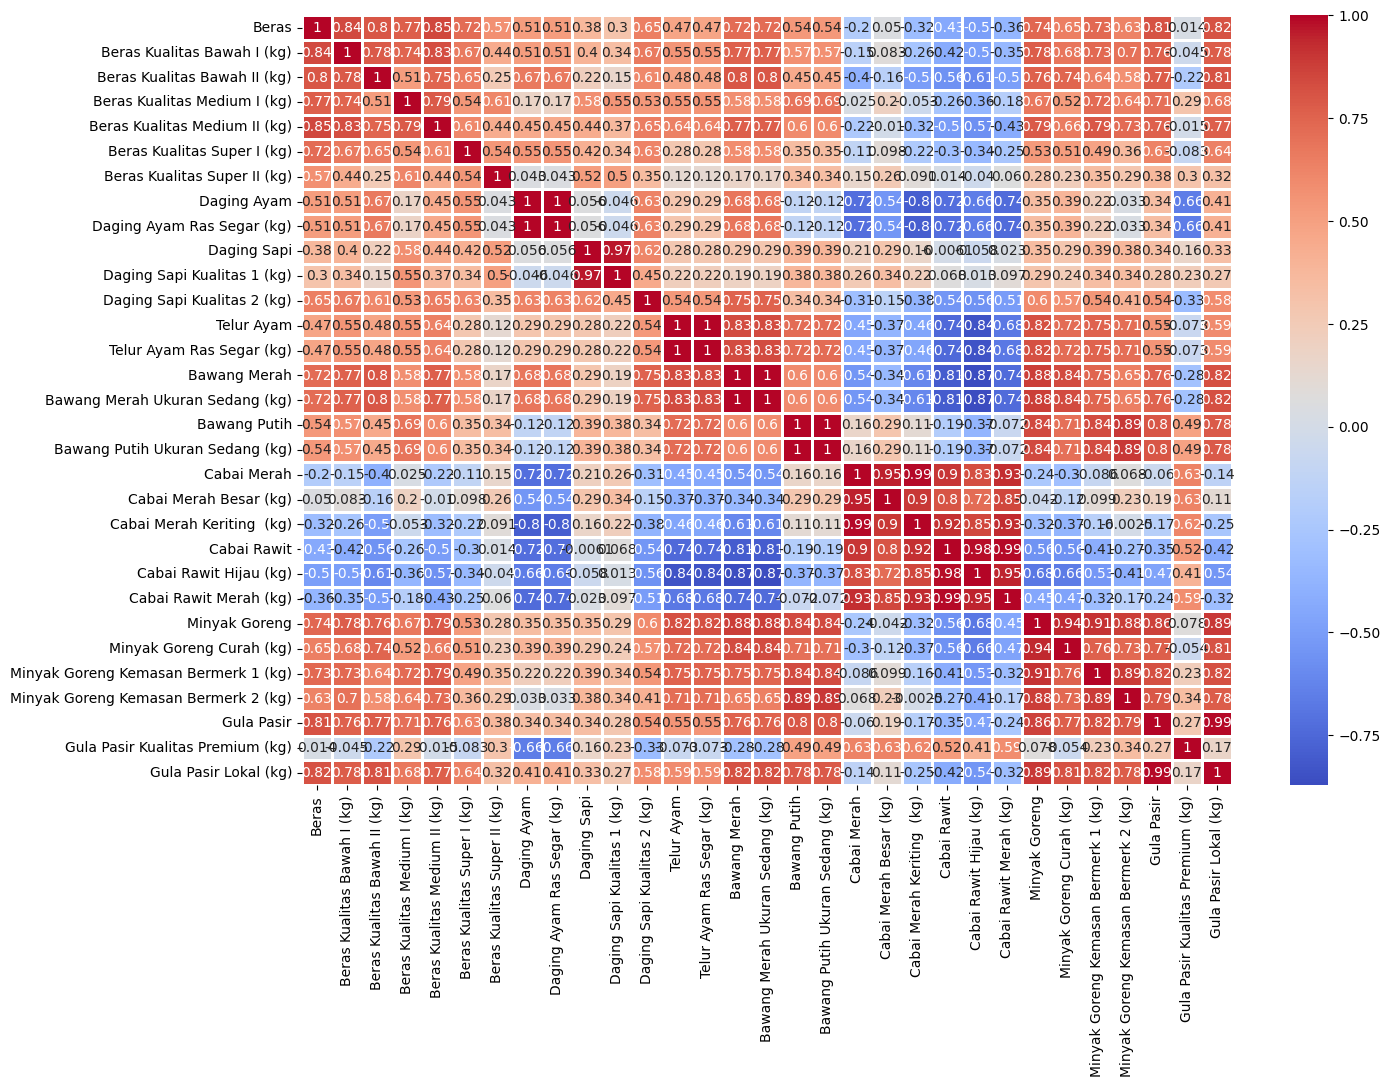

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(dataset.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

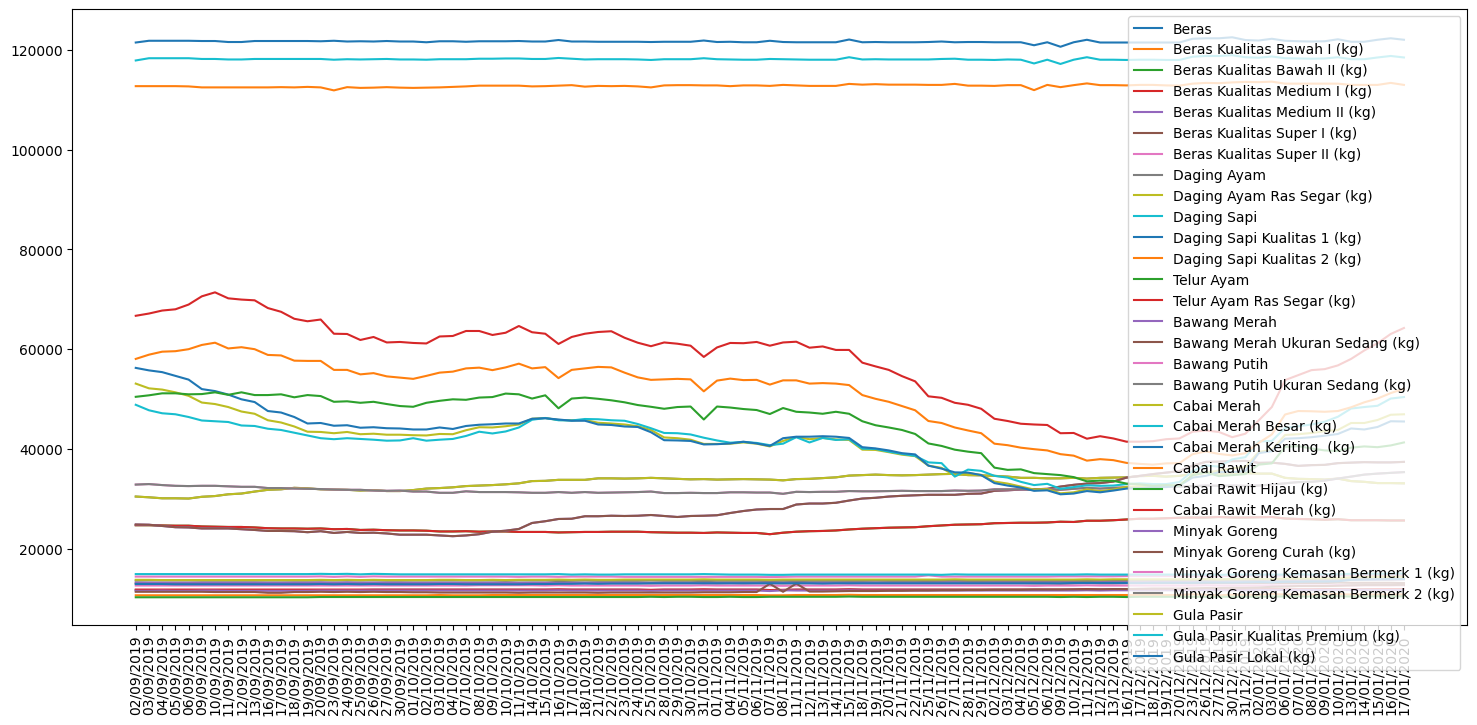

In [ ]:
plt.figure(figsize=(18, 8))

x_values = dataset['Date']

for column in dataset.columns[1:]:
    y_values = dataset[column]
    plt.plot(x_values, y_values, label=column)

plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# Ambil semua kolom kecuali "Date" sebagai fitur
features = dataset.drop(["Date"], axis=1)

# Normalisasi fitur
features_normalized = (features - features.min()) / (features.max() - features.min())

# Inisialisasi parameter
input_layer_size = features_normalized.shape[1]
output_layer_size = 1
hidden_layer_size = 10
learning_rate = 0.001
epochs = 10000

# Inisialisasi bobot dan bias secara acak
np.random.seed(25)
weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))

bias_hidden = np.zeros((1, hidden_layer_size))
bias_output = np.zeros((1, output_layer_size))

# Ambil kolom target dan lakukan training dan evaluasi untuk setiap kolom
for target_column in features_normalized.columns:
    target = dataset[target_column].values.reshape(-1, 1)

    # Split dataset menjadi data latih dan data uji (60% data latih, 40% data uji)
    train_size = int(len(features_normalized) * 0.6)
    train_features, test_features = features_normalized[:train_size], features_normalized[train_size:]
    train_target, test_target = target[:train_size], target[train_size:]

    # Training menggunakan backpropagation pada data latih
    for epoch in range(epochs):
        # Feedforward
        hidden_layer_input = np.dot(train_features, weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = output_layer_input  # Menggunakan fungsi aktivasi linear

        # Menghitung error
        error = calculate_error(predicted_output, train_target)

        # Backpropagation
        output_delta = error
        hidden_layer_error = output_delta.dot(weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

        # Update bobot dan bias
        weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
        weights_input_hidden += train_features.T.dot(hidden_layer_delta) * learning_rate

        bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    # Prediksi menggunakan model yang telah dilatih pada data uji
    def predict(features):
        hidden_layer_input = np.dot(features, weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = output_layer_input  # Menggunakan fungsi aktivasi linear

        return predicted_output

        # Prediksi menggunakan model yang telah dilatih pada data uji
    def predict_future(features, num_days):
        predictions = []
        last_prediction = features[-1].reshape(1, -1)

        for _ in range(num_days):
            hidden_input = np.dot(last_prediction, weights_input_hidden) + bias_hidden
            hidden_output = sigmoid(hidden_input)
            output = np.dot(hidden_output, weights_hidden_output) + bias_output

            predictions.append(output[0, 0])
            last_prediction = np.append(last_prediction[:, 1:], output).reshape(1, -1)

        return predictions

    # Panggil fungsi untuk memprediksi harga ke depan
    num_days_to_predict = 3
    future_predictions = predict_future(test_features[-1:].values, num_days_to_predict)

    # Menghitung prediksi harga pada data uji
    test_predicted = predict(test_features)

    # Menghitung error atau perbedaan antara nilai prediksi dan nilai aktual untuk mengukur akurasi
    test_accuracy = np.mean(np.abs(test_predicted - test_target) / test_target) * 100

    print(f"Akurasi Data Uji ({target_column}): {100 - test_accuracy:.2f}%")

Akurasi Data Uji (Beras): 99.63%
Akurasi Data Uji (Beras Kualitas Bawah I (kg)): 99.38%
Akurasi Data Uji (Beras Kualitas Bawah II (kg)): 99.39%
Akurasi Data Uji (Beras Kualitas Medium I (kg)): 99.73%
Akurasi Data Uji (Beras Kualitas Medium II (kg)): 99.49%
Akurasi Data Uji (Beras Kualitas Super I (kg)): 99.71%
Akurasi Data Uji (Beras Kualitas Super II (kg)): 99.87%


<ipython-input-7-770b060aefcf>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Akurasi Data Uji (Daging Ayam): 95.40%
Akurasi Data Uji (Daging Ayam Ras Segar (kg)): 95.40%
Akurasi Data Uji (Daging Sapi): 99.78%
Akurasi Data Uji (Daging Sapi Kualitas 1 (kg)): 99.77%
Akurasi Data Uji (Daging Sapi Kualitas 2 (kg)): 99.64%
Akurasi Data Uji (Telur Ayam): 92.68%
Akurasi Data Uji (Telur Ayam Ras Segar (kg)): 92.68%
Akurasi Data Uji (Bawang Merah): 74.14%
Akurasi Data Uji (Bawang Merah Ukuran Sedang (kg)): 74.14%
Akurasi Data Uji (Bawang Putih): 96.94%
Akurasi Data Uji (Bawang Putih Ukuran Sedang (kg)): 96.94%
Akurasi Data Uji (Cabai Merah): 77.05%
Akurasi Data Uji (Cabai Merah Besar (kg)): 80.21%
Akurasi Data Uji (Cabai Merah Keriting  (kg)): 74.05%
Akurasi Data Uji (Cabai Rawit): 68.03%
Akurasi Data Uji (Cabai Rawit Hijau (kg)): 66.69%
Akurasi Data Uji (Cabai Rawit Merah (kg)): 67.60%
Akurasi Data Uji (Minyak Goreng): 97.71%
Akurasi Data Uji (Minyak Goreng Curah (kg)): 94.10%
Akurasi Data Uji (Minyak Goreng Kemasan Bermerk 1 (kg)): 99.12%
Akurasi Data Uji (Minyak Goren

In [ ]:
# Ambil semua kolom kecuali "Date" sebagai fitur
features = dataset.drop(["Date"], axis=1)

# Normalisasi fitur
features_normalized = (features - features.min()) / (features.max() - features.min())

# Inisialisasi parameter
input_layer_size = features_normalized.shape[1]
output_layer_size = 1
hidden_layer_size = 10
learning_rate = 0.001
epochs = 10000

# Inisialisasi bobot dan bias secara acak
np.random.seed(25)
weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))

bias_hidden = np.zeros((1, hidden_layer_size))
bias_output = np.zeros((1, output_layer_size))

# Ambil kolom target dan lakukan training dan evaluasi untuk setiap kolom
for target_column in features_normalized.columns:
    target = dataset[target_column].values.reshape(-1, 1)

    # Split dataset menjadi data latih dan data uji (60% data latih, 40% data uji)
    train_size = int(len(features_normalized) * 0.6)
    train_features, test_features = features_normalized[:train_size], features_normalized[train_size:]
    train_target, test_target = target[:train_size], target[train_size:]

    # Training menggunakan backpropagation pada data latih
    for epoch in range(epochs):
        # Feedforward
        hidden_layer_input = np.dot(train_features, weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = output_layer_input  # Menggunakan fungsi aktivasi linear

        # Menghitung error
        error = calculate_error(predicted_output, train_target)

        # Backpropagation
        output_delta = error
        hidden_layer_error = output_delta.dot(weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

        # Update bobot dan bias
        weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
        weights_input_hidden += train_features.T.dot(hidden_layer_delta) * learning_rate

        bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    # Prediksi menggunakan model yang telah dilatih pada data uji
    def predict(features):
        hidden_layer_input = np.dot(features, weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = output_layer_input  # Menggunakan fungsi aktivasi linear

        return predicted_output

    # Menghitung prediksi harga pada data uji
    test_predicted = predict(test_features)

    # Menghitung error atau perbedaan antara nilai prediksi dan nilai aktual untuk mengukur akurasi
    test_accuracy = np.mean(np.abs(test_predicted - test_target) / test_target) * 100

    print(f"Akurasi Data Uji ({target_column}): {100 - test_accuracy:.2f}%")
    # Prediksi 30 hari ke depan
    future_features = features_normalized[-30:]  # Ambil 30 hari terakhir sebagai data baru
    future_predictions = predict(future_features)

    print(f"Prediksi Harga ke Depan ({target_column}):")
    for i, prediction in enumerate(future_predictions, start=1):
        print(f"Hari ke-{i}: RP {prediction}")
    print("\n")


Akurasi Data Uji (Beras): 99.63%
Prediksi Harga ke Depan (Beras):
Hari ke-1: RP [11732.75562278]
Hari ke-2: RP [11732.71988962]
Hari ke-3: RP [11732.75380045]
Hari ke-4: RP [11732.72037115]
Hari ke-5: RP [11732.75376381]
Hari ke-6: RP [11732.75863978]
Hari ke-7: RP [11732.75462075]
Hari ke-8: RP [11732.75597467]
Hari ke-9: RP [11732.75648181]
Hari ke-10: RP [11732.75761868]
Hari ke-11: RP [11732.75786392]
Hari ke-12: RP [11732.75782987]
Hari ke-13: RP [11732.75802444]
Hari ke-14: RP [11732.75890629]
Hari ke-15: RP [11732.75894584]
Hari ke-16: RP [11732.75889537]
Hari ke-17: RP [11732.7589358]
Hari ke-18: RP [11732.75893218]
Hari ke-19: RP [11732.75895096]
Hari ke-20: RP [11732.75895551]
Hari ke-21: RP [11732.7589547]
Hari ke-22: RP [11732.7589551]
Hari ke-23: RP [11732.7589548]
Hari ke-24: RP [11732.75895534]
Hari ke-25: RP [11732.75895573]
Hari ke-26: RP [11732.75895559]
Hari ke-27: RP [11732.75895571]
Hari ke-28: RP [11732.75895573]
Hari ke-29: RP [11732.75895574]
Hari ke-30: RP [117

<ipython-input-7-770b060aefcf>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Akurasi Data Uji (Daging Ayam): 95.40%
Prediksi Harga ke Depan (Daging Ayam):
Hari ke-1: RP [32779.31028162]
Hari ke-2: RP [32779.30719521]
Hari ke-3: RP [32779.31021137]
Hari ke-4: RP [32779.30657516]
Hari ke-5: RP [32779.31019772]
Hari ke-6: RP [32779.3103442]
Hari ke-7: RP [32779.31021304]
Hari ke-8: RP [32779.31027454]
Hari ke-9: RP [32779.31029039]
Hari ke-10: RP [32779.31032209]
Hari ke-11: RP [32779.31032683]
Hari ke-12: RP [32779.31032443]
Hari ke-13: RP [32779.31032882]
Hari ke-14: RP [32779.31034619]
Hari ke-15: RP [32779.31034654]
Hari ke-16: RP [32779.31034634]
Hari ke-17: RP [32779.31034651]
Hari ke-18: RP [32779.31034647]
Hari ke-19: RP [32779.31034656]
Hari ke-20: RP [32779.31034657]
Hari ke-21: RP [32779.31034657]
Hari ke-22: RP [32779.31034657]
Hari ke-23: RP [32779.31034657]
Hari ke-24: RP [32779.31034657]
Hari ke-25: RP [32779.31034657]
Hari ke-26: RP [32779.31034657]
Hari ke-27: RP [32779.31034657]
Hari ke-28: RP [32779.31034657]
Hari ke-29: RP [32779.31034657]
Hari

<ipython-input-7-770b060aefcf>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Akurasi Data Uji (Beras): 99.63%


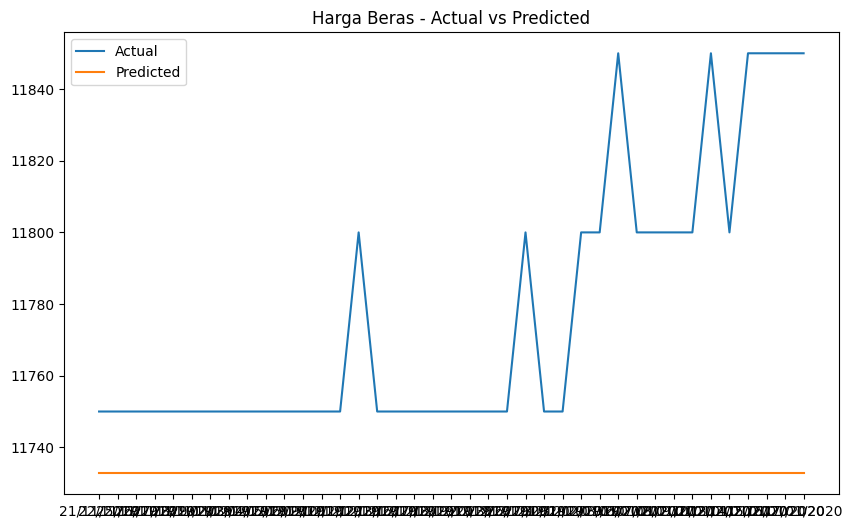

Akurasi Data Uji (Beras Kualitas Bawah I (kg)): 99.38%


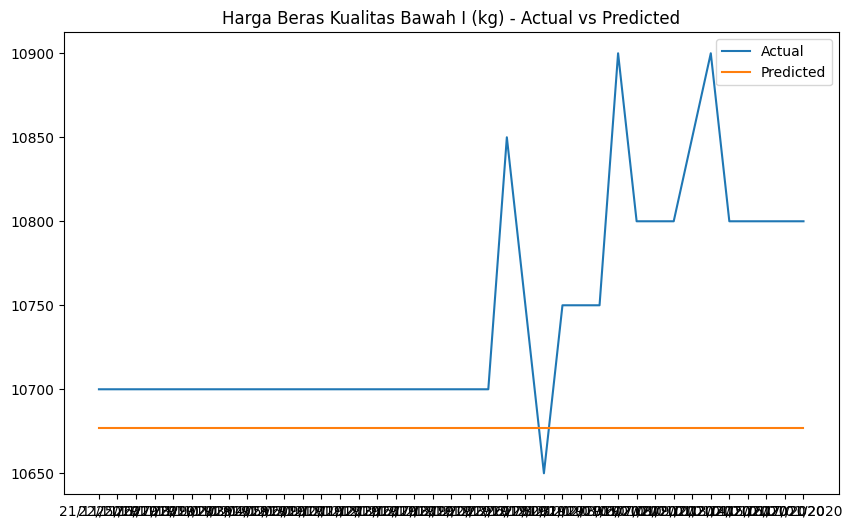

Akurasi Data Uji (Beras Kualitas Bawah II (kg)): 99.39%


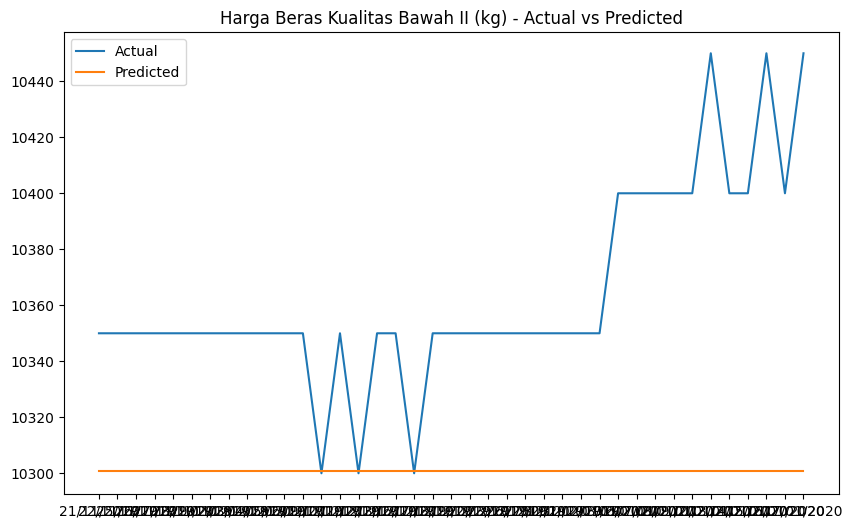

Akurasi Data Uji (Beras Kualitas Medium I (kg)): 99.73%


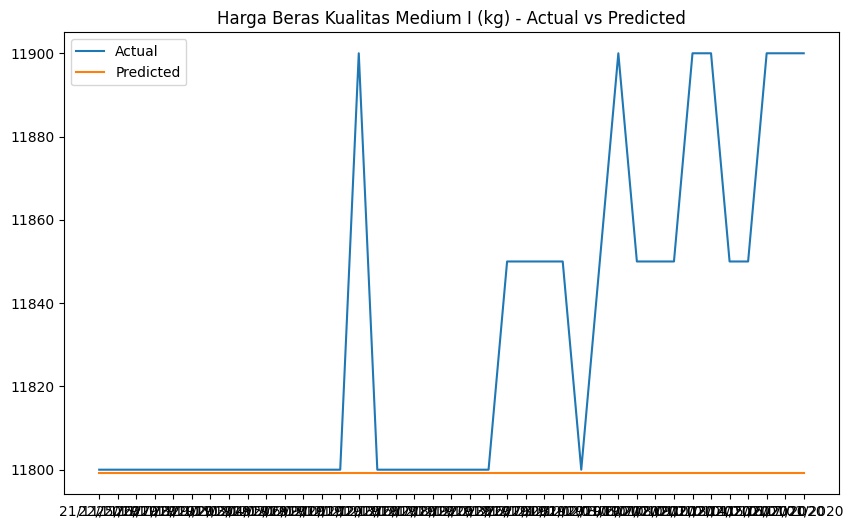

Akurasi Data Uji (Beras Kualitas Medium II (kg)): 99.49%


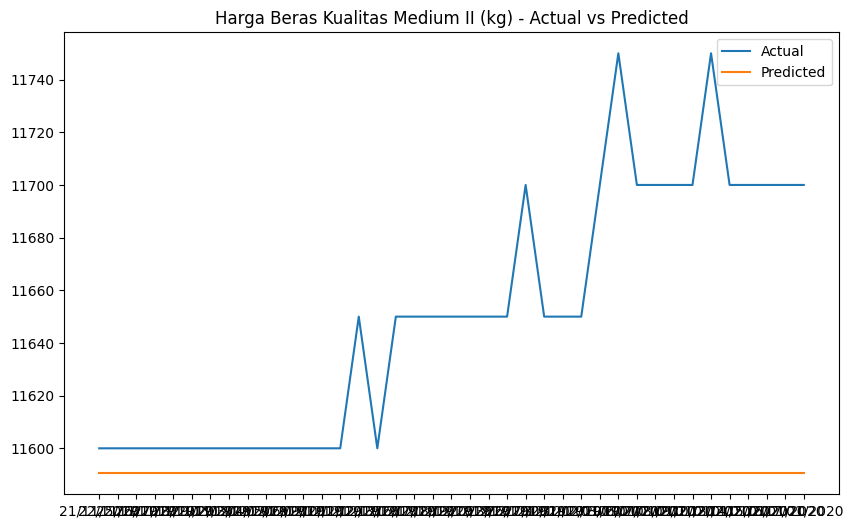

Akurasi Data Uji (Beras Kualitas Super I (kg)): 99.71%


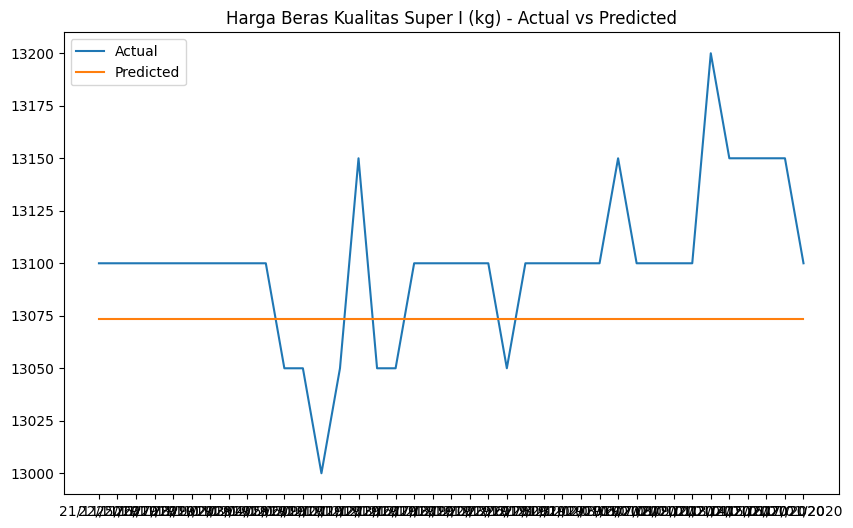

Akurasi Data Uji (Beras Kualitas Super II (kg)): 99.87%


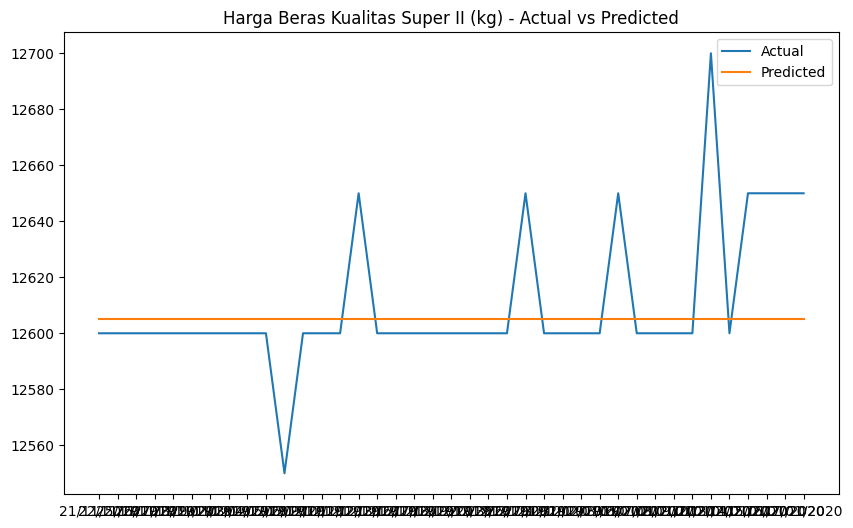

Akurasi Data Uji (Daging Ayam): 95.40%


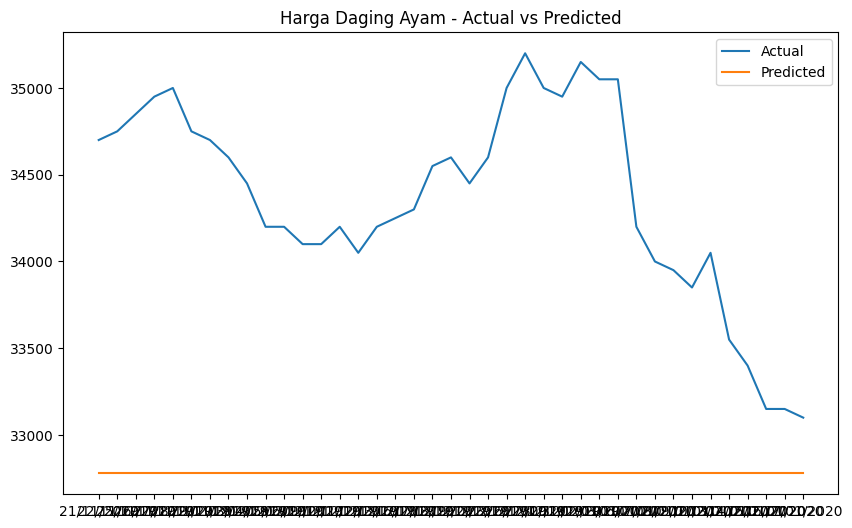

Akurasi Data Uji (Daging Ayam Ras Segar (kg)): 95.40%


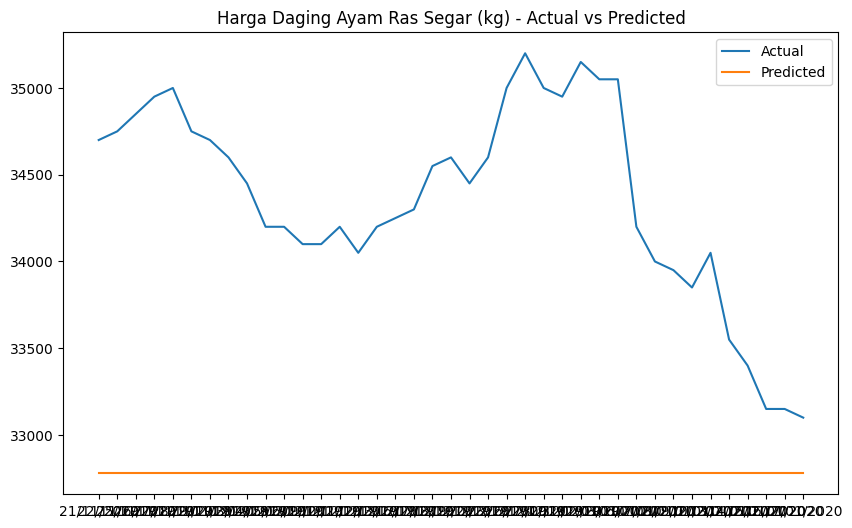

Akurasi Data Uji (Daging Sapi): 99.78%


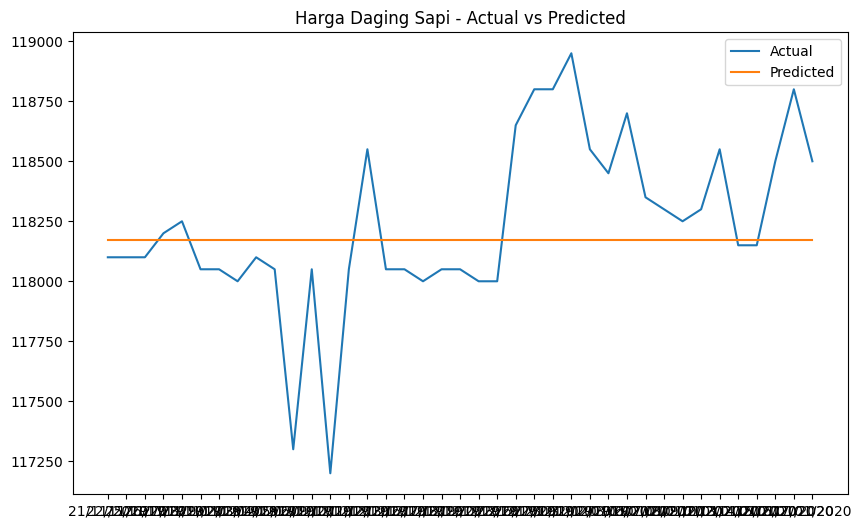

Akurasi Data Uji (Daging Sapi Kualitas 1 (kg)): 99.77%


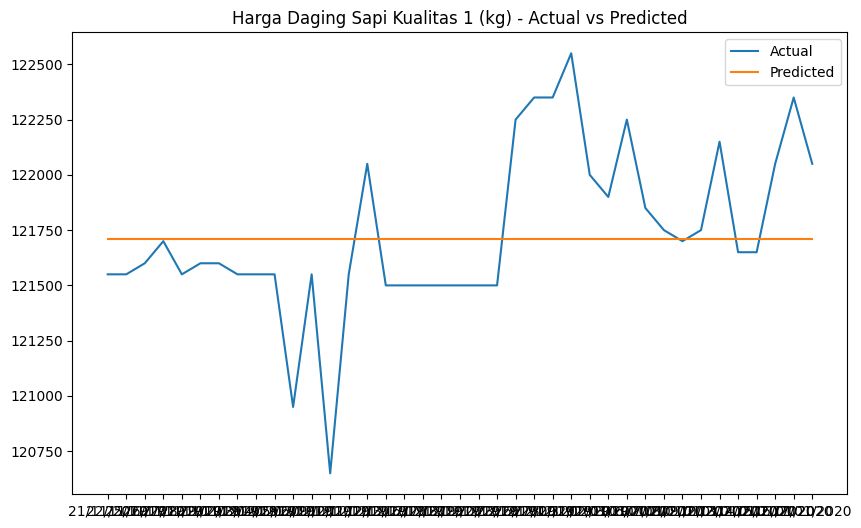

Akurasi Data Uji (Daging Sapi Kualitas 2 (kg)): 99.64%


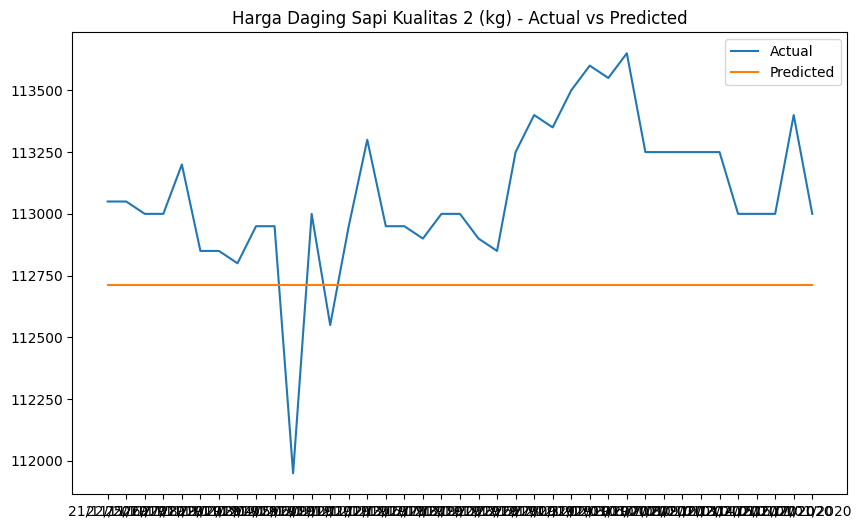

Akurasi Data Uji (Telur Ayam): 92.68%


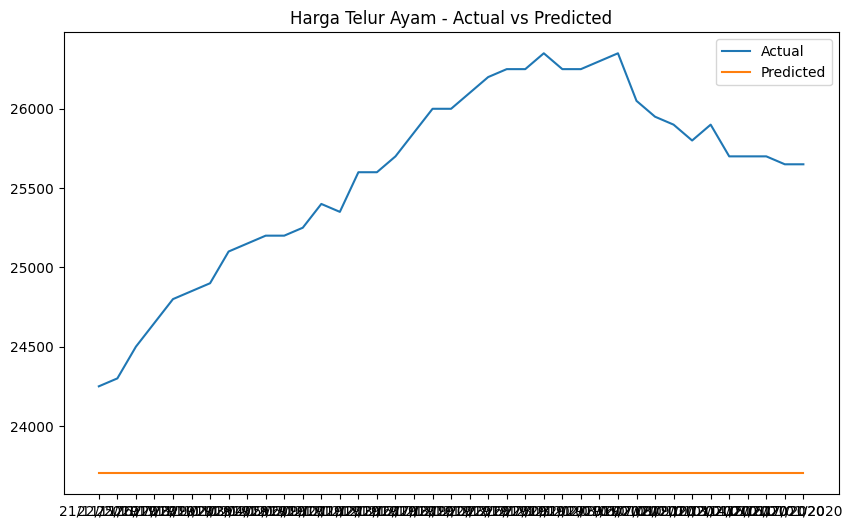

Akurasi Data Uji (Telur Ayam Ras Segar (kg)): 92.68%


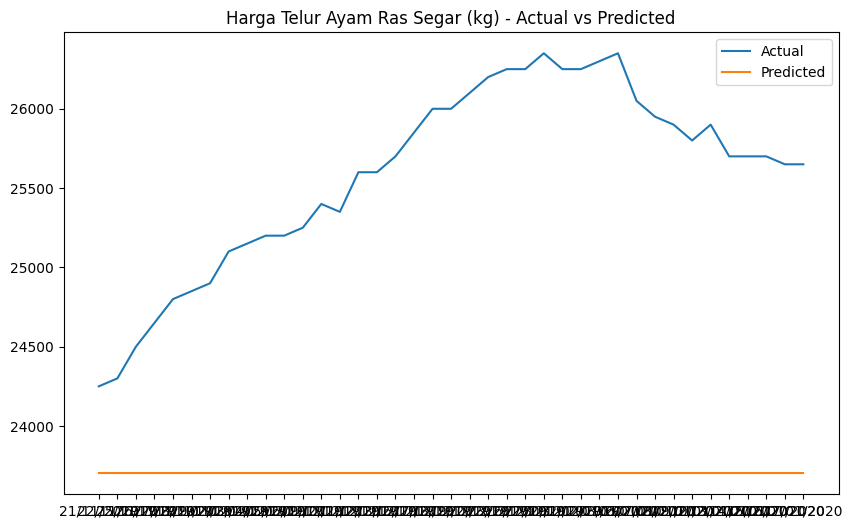

Akurasi Data Uji (Bawang Merah): 74.14%


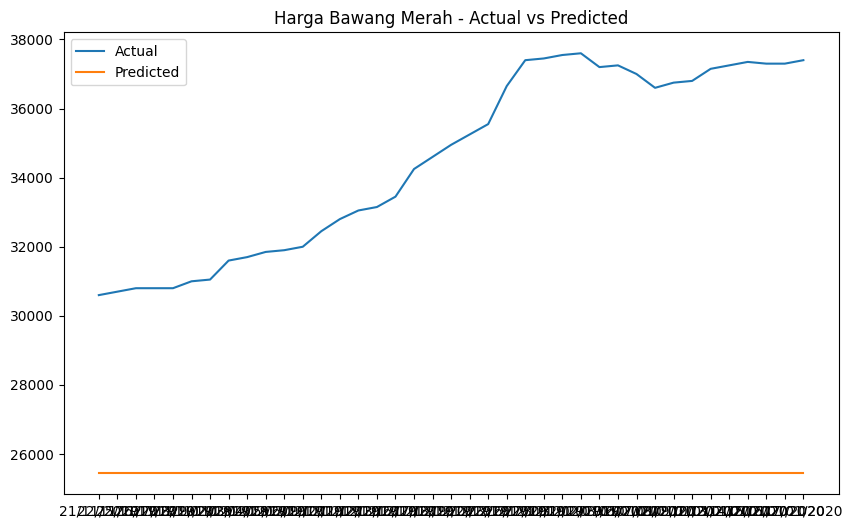

Akurasi Data Uji (Bawang Merah Ukuran Sedang (kg)): 74.14%


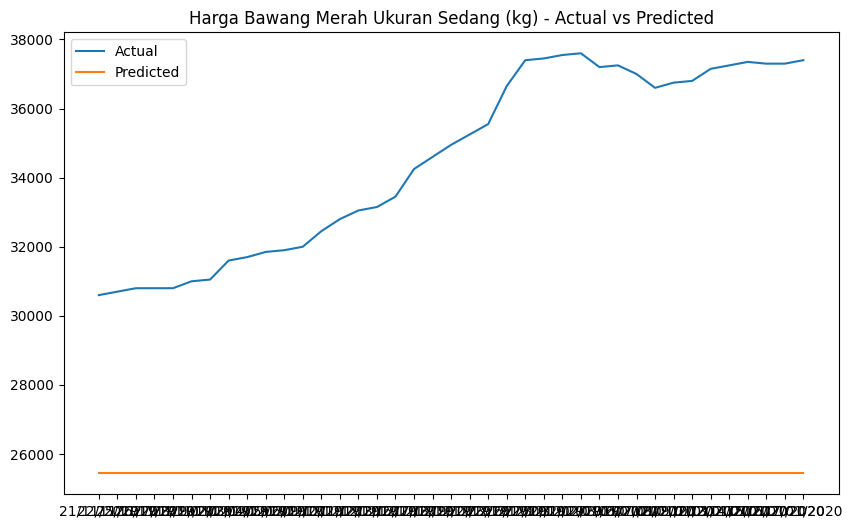

Akurasi Data Uji (Bawang Putih): 96.94%


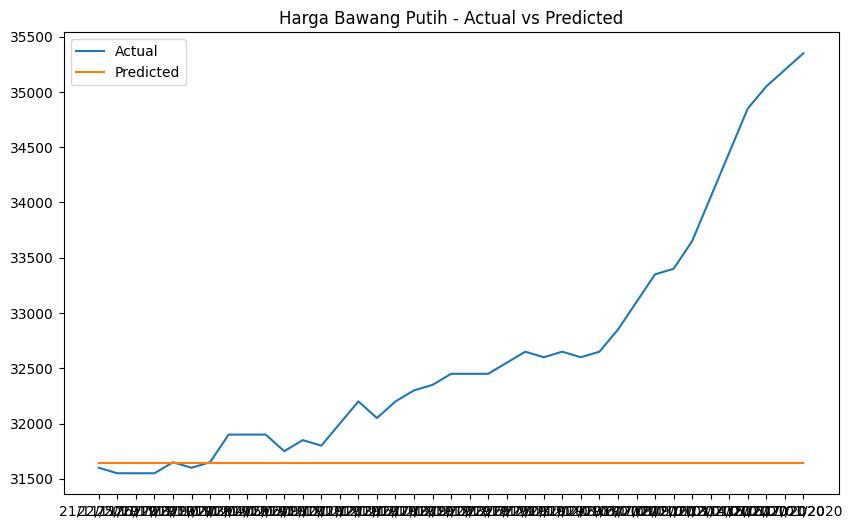

Akurasi Data Uji (Bawang Putih Ukuran Sedang (kg)): 96.94%


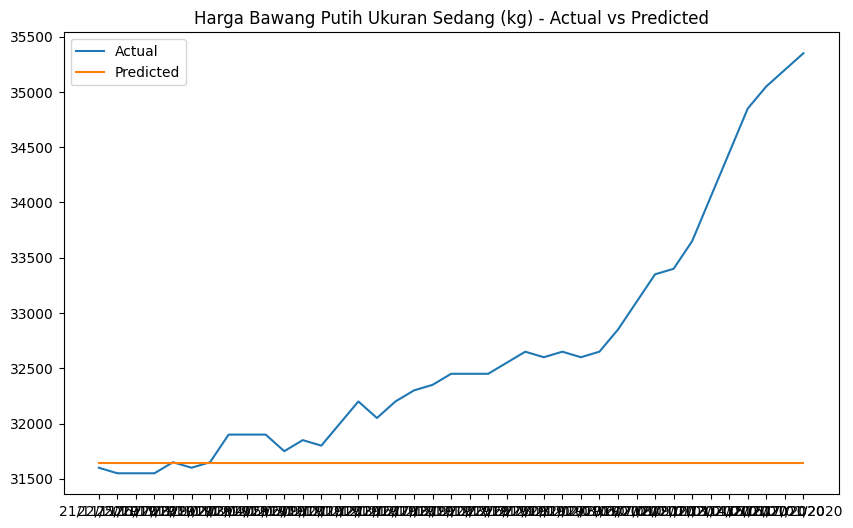

Akurasi Data Uji (Cabai Merah): 77.05%


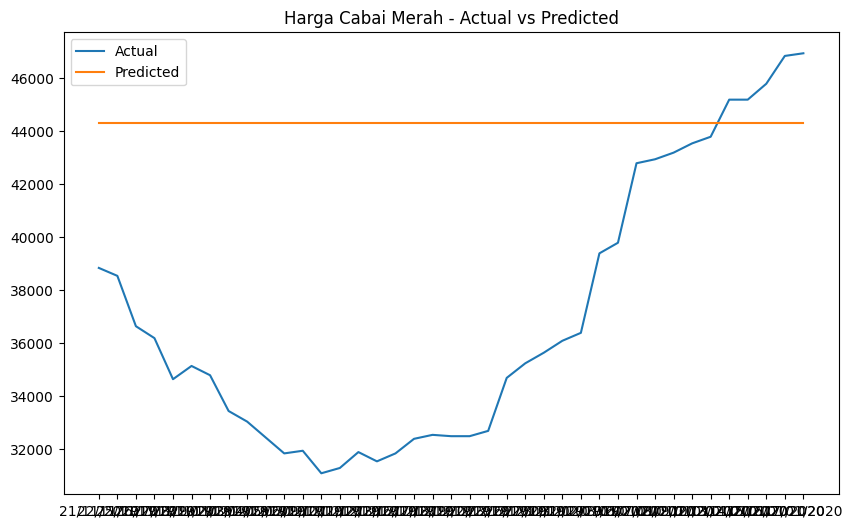

Akurasi Data Uji (Cabai Merah Besar (kg)): 80.21%


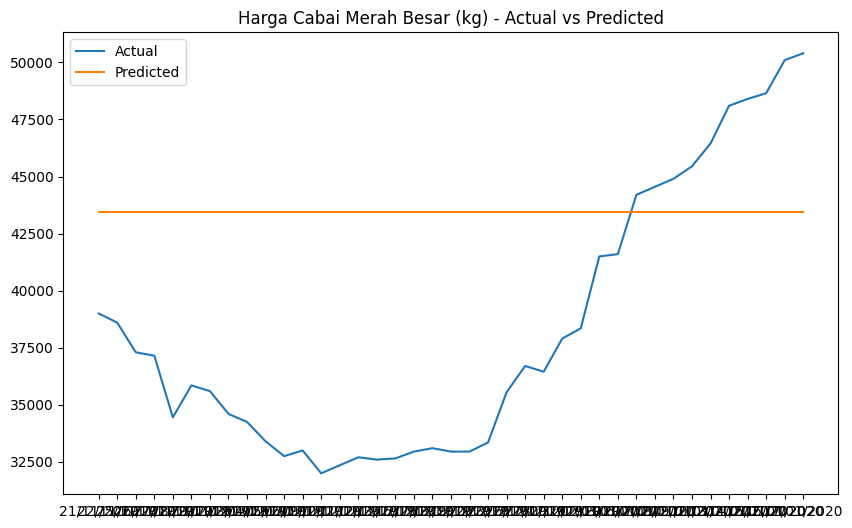

Akurasi Data Uji (Cabai Merah Keriting  (kg)): 74.05%


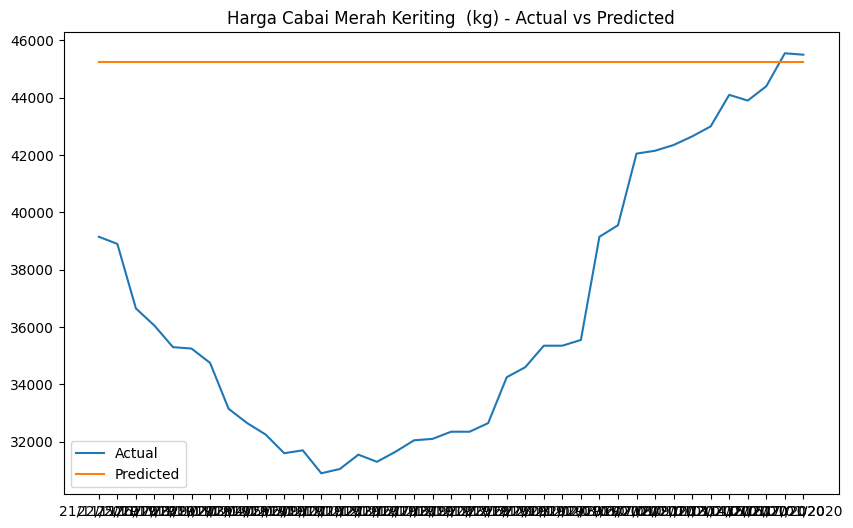

Akurasi Data Uji (Cabai Rawit): 68.03%


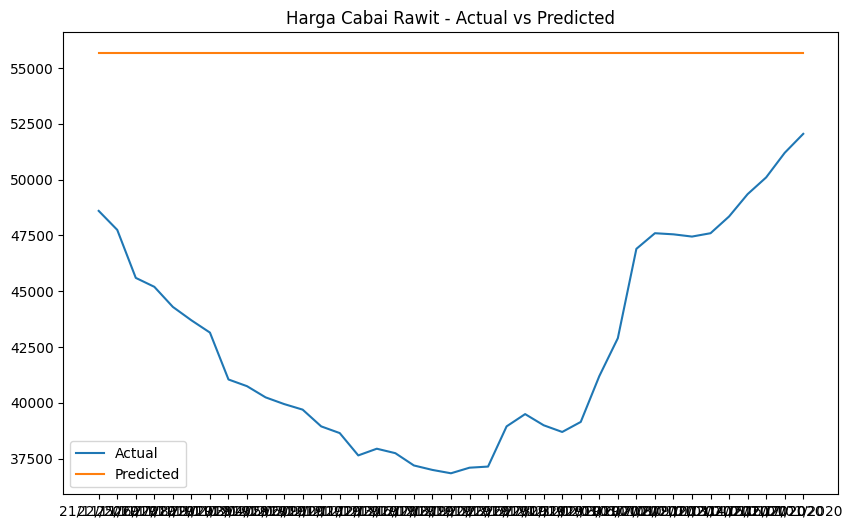

Akurasi Data Uji (Cabai Rawit Hijau (kg)): 66.69%


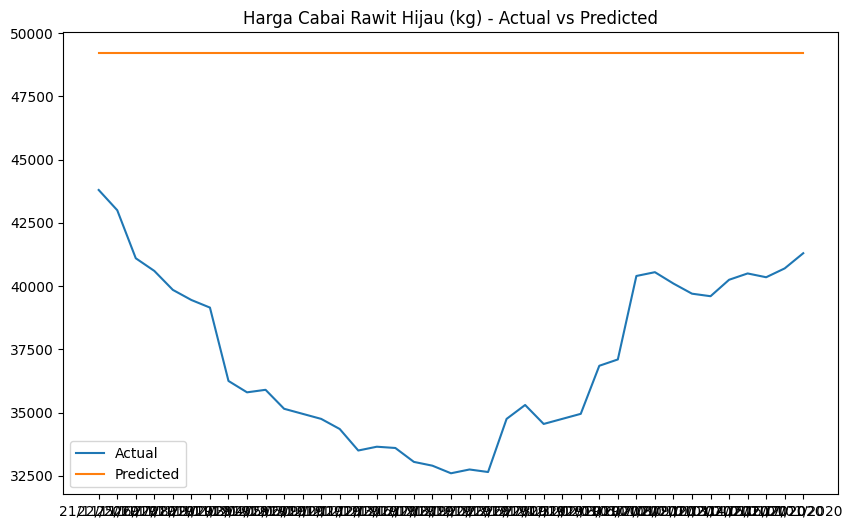

Akurasi Data Uji (Cabai Rawit Merah (kg)): 67.60%


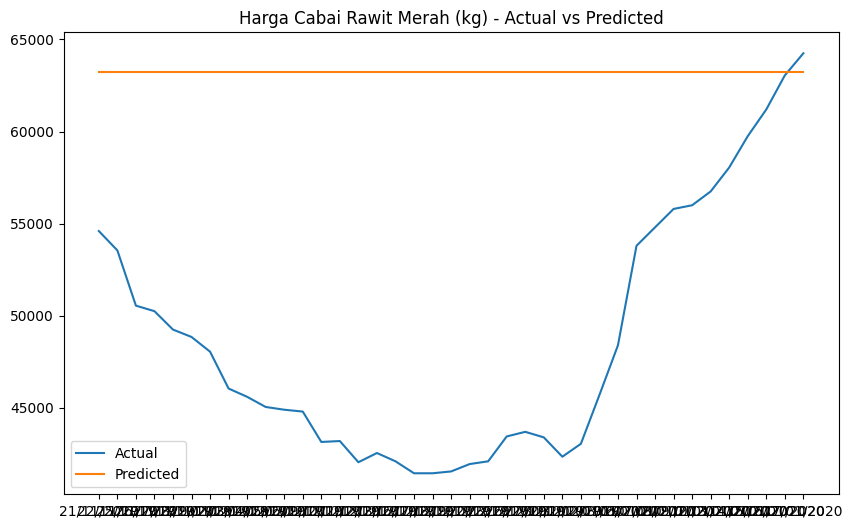

Akurasi Data Uji (Minyak Goreng): 97.71%


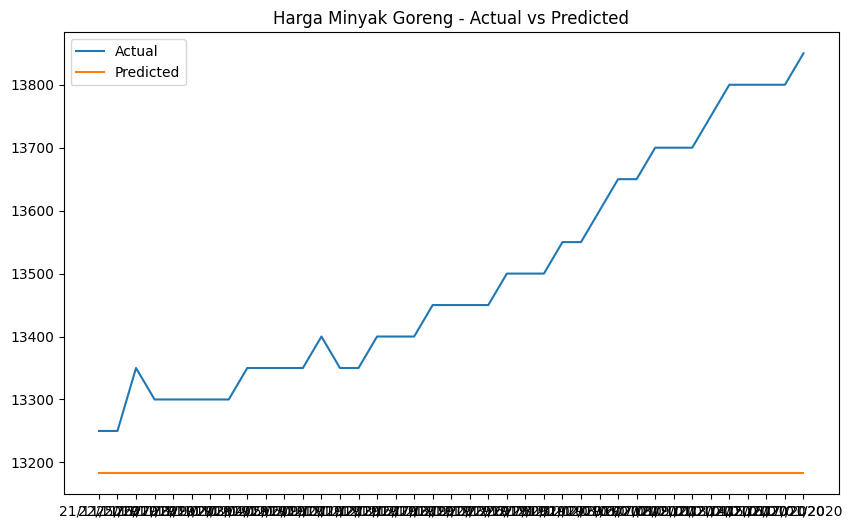

Akurasi Data Uji (Minyak Goreng Curah (kg)): 94.10%


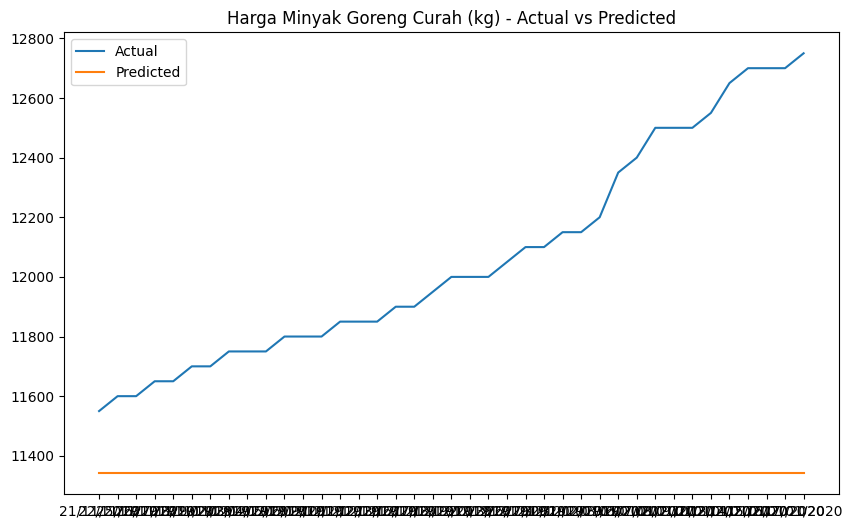

Akurasi Data Uji (Minyak Goreng Kemasan Bermerk 1 (kg)): 99.12%


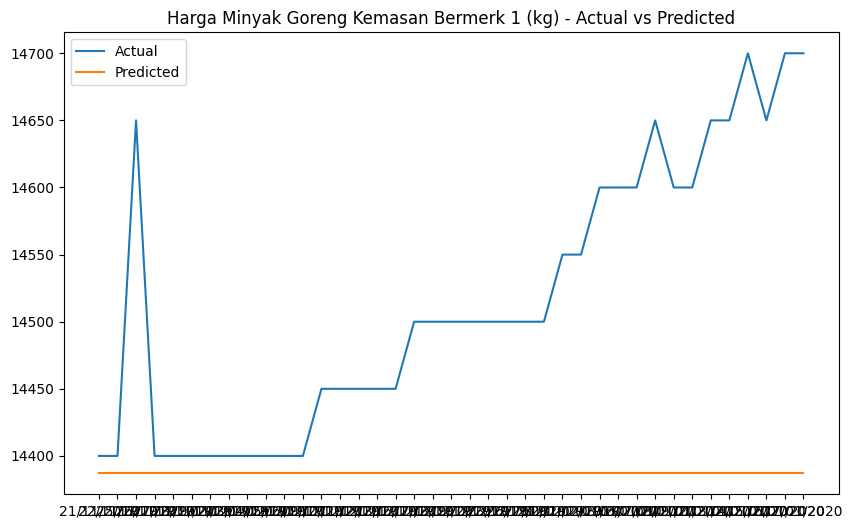

Akurasi Data Uji (Minyak Goreng Kemasan Bermerk 2 (kg)): 99.11%


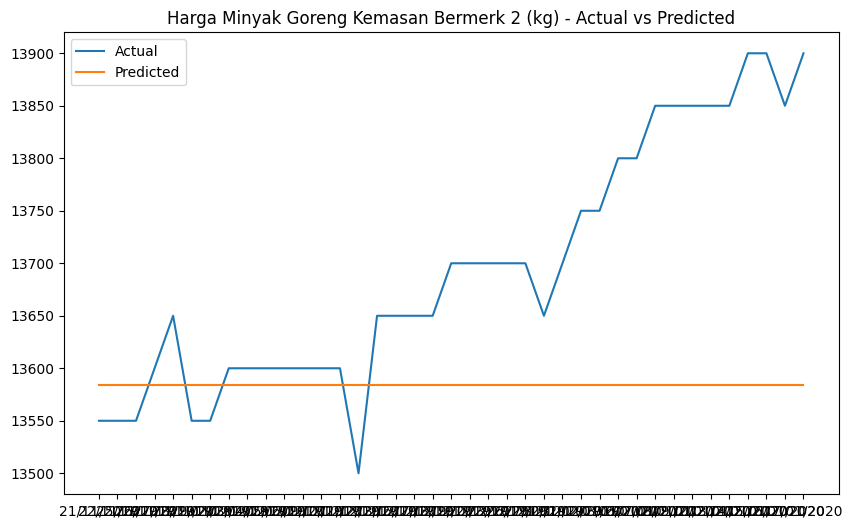

Akurasi Data Uji (Gula Pasir): 98.79%


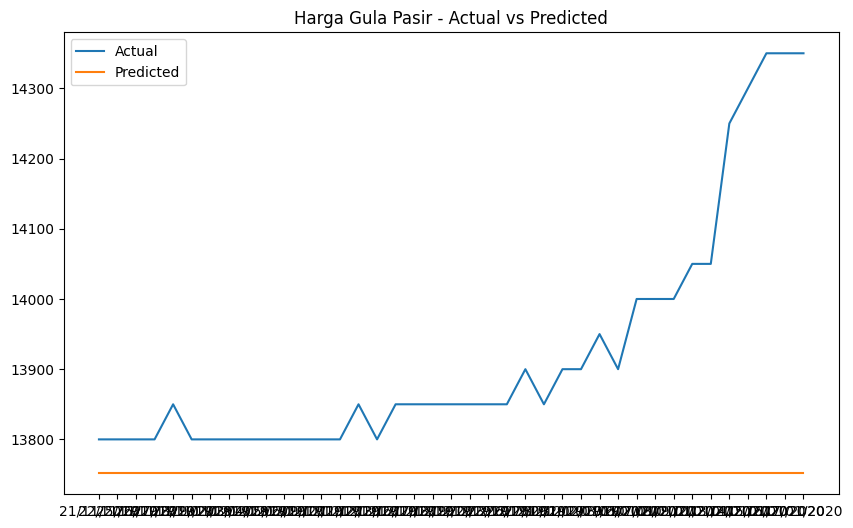

Akurasi Data Uji (Gula Pasir Kualitas Premium (kg)): 99.59%


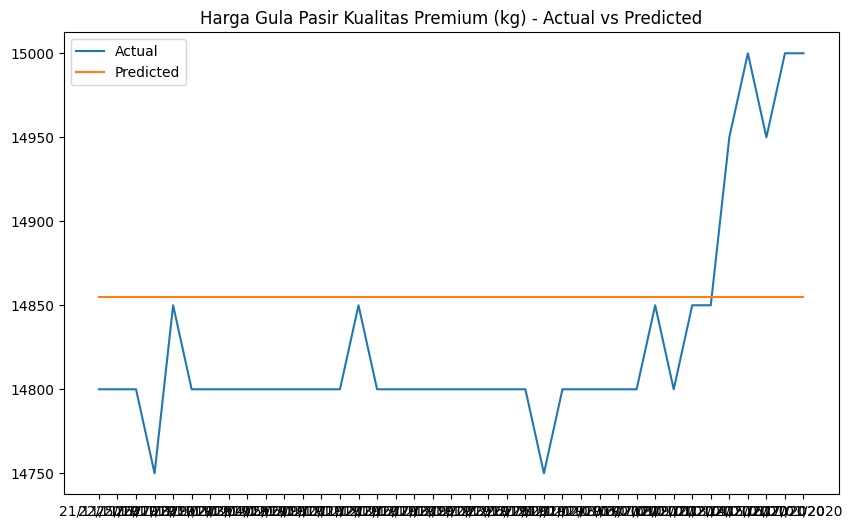

Akurasi Data Uji (Gula Pasir Lokal (kg)): 97.75%


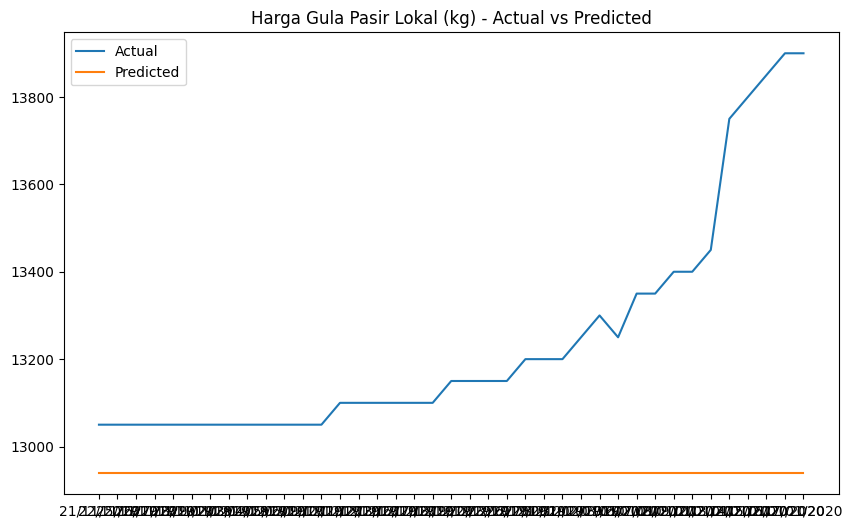

In [ ]:
# # Ambil kolom target dan lakukan training dan evaluasi untuk setiap kolom
# for target_column in features_normalized.columns:
#     target = dataset[target_column].values.reshape(-1, 1)

#     # Split dataset menjadi data latih dan data uji (60% data latih, 40% data uji)
#     train_size = int(len(features_normalized) * 0.6)
#     train_features, test_features = features_normalized[:train_size], features_normalized[train_size:]
#     train_target, test_target = target[:train_size], target[train_size:]

#     # Training menggunakan backpropagation pada data latih
#     for epoch in range(epochs):
#         # Feedforward
#         hidden_layer_input = np.dot(train_features, weights_input_hidden) + bias_hidden
#         hidden_layer_output = sigmoid(hidden_layer_input)

#         output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
#         predicted_output = output_layer_input  # Menggunakan fungsi aktivasi linear

#         # Menghitung error
#         error = calculate_error(predicted_output, train_target)

#         # Backpropagation
#         output_delta = error
#         hidden_layer_error = output_delta.dot(weights_hidden_output.T)
#         hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

#         # Update bobot dan bias
#         weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
#         weights_input_hidden += train_features.T.dot(hidden_layer_delta) * learning_rate

#         bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
#         bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

#     # Prediksi menggunakan model yang telah dilatih pada data uji
#     def predict(features):
#         hidden_layer_input = np.dot(features, weights_input_hidden) + bias_hidden
#         hidden_layer_output = sigmoid(hidden_layer_input)

#         output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
#         predicted_output = output_layer_input  # Menggunakan fungsi aktivasi linear

#         return predicted_output

#     # Menghitung prediksi harga pada data uji
#     test_predicted = predict(test_features)

#     # Menghitung error atau perbedaan antara nilai prediksi dan nilai aktual untuk mengukur akurasi
#     test_accuracy = np.mean(np.abs(test_predicted - test_target) / test_target) * 100

#     print(f"Akurasi Data Uji ({target_column}): {100 - test_accuracy:.2f}%")

#     plt.figure(figsize=(10, 6))
#     plt.plot(dataset["Date"][train_size:], test_target, label="Actual")
#     plt.plot(dataset["Date"][train_size:], test_predicted, label="Predicted")
#     plt.title(f"Harga {target_column} - Actual vs Predicted")
#     plt.legend()
#     plt.show()